Nama : Nurul Fajriyah Al Maulidiyah

Kode : PYTN-KS14-001

# London Crime Data

## Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium

## Membaca dataset 

In [66]:
df = pd.read_csv('Assignment1/dataset/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


**Keterangan**

- `lsoa_code` : merepresentasikan area kepolisian
- `borough` : wilayah di london yang terkait dengan statistik
- `major_category` : kategori kejahatan utama
- `minor_category` : kategori kejahatan kecil
- `value` : jumlah kejahatan yang terjadi di wilayah tertentu, pada bulan tersebut
- `year` : tahun ringkasan statistik
- `month` : bulan ringkasan statistik

## Data Cleaning

Membuat variabel 'df_crime' dan menghapus data yang memiliki value = 0

In [3]:
df_crime = df[df.value != 0]

Mereset index

In [4]:
df_crime.reset_index(drop=True, inplace=True)

Menampilkan 5 data teratas yang sudah dibersihkan

In [5]:
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
4,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


## Data Preprocessing

Menampilkan jumlah baris dan kolom dari DataFrame

In [6]:
df_crime.shape

(3419099, 7)

Menampilkan informasi detail tentang DataFrame seperti jumlah baris data, nama-nama kolom beserta jumlah data dan tipe datanya, dan sebagainya

In [7]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419099 entries, 0 to 3419098
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 182.6+ MB


Mengecek apakah ada missing value

In [8]:
df_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Mengecek apakah ada duplikat dalam data dan jumlah value dalam DataFrame

In [9]:
df_crime.duplicated().value_counts()

False    3419099
dtype: int64

Menampilkan statistik deskriptif data dalam DataFrame

In [10]:
df_crime.describe()

,value,year,month
count,3.419099e+06,3.419099e+06,3.419099e+06
mean,1.885806e+00,2.011991e+03,6.511021e+00
std,3.118902e+00,2.602550e+00,3.422459e+00
min,1.000000e+00,2.008000e+03,1.000000e+00
25%,1.000000e+00,2.010000e+03,4.000000e+00
50%,1.000000e+00,2.012000e+03,7.000000e+00
75%,2.000000e+00,2.014000e+03,9.000000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Menampilkan total major category di setiap tahun dalam bentuk tabel 

In [11]:
crime = df_crime.pivot_table(index='year', columns='major_category', values='value', aggfunc=np.sum, fill_value=0)
crime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Melakukan transpose dari variabel 'crime'

In [12]:
major_crime = crime.transpose()
major_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


Menambahkan kolom 'Total Crime' yang merangkum total major category pada setiap tahun

In [13]:
crime['Total Crime'] = crime.sum(axis=1, numeric_only=True)
crime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total Crime
year,,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844,738641
2009,90619,85565,60549,0,10644,29568,0,279492,160777,717214
2010,86826,77897,58674,0,10768,32341,0,290924,157894,715324
2011,93315,70914,57550,0,10264,36679,0,309292,146901,724915
2012,93392,62158,51776,0,10675,35260,0,334054,150014,737329
2013,87222,56206,50278,0,10811,29337,0,306372,146181,686407
2014,76053,59279,44435,0,13037,22150,0,279880,185349,680183
2015,70489,62976,39785,0,14229,21383,0,284022,218740,711624
2016,68285,64071,38914,0,15809,22528,0,294133,232381,736121


Menambahkan kolom 'Total' yang merangkum total kasus pada setiap kategori

In [14]:
major_crime['Total'] = major_crime.sum(axis=1, numeric_only=True)
major_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


Nama kolom yang merupakan bilangan bulat (seperti tahun) mungkin akan menimbulkan kebingungan. Misalnya ketika kita mengacu pada tahun 2013, orang mungkin bingung ketika 2013 adalah indeks posisi 2013.

Oleh karena itu, untuk mengatasi ambiguitas tersebut nama kolom diubah menjadi string '2008' hingga '2016'

In [15]:
major_crime.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 'Total'], dtype='object', name='year')

In [16]:
major_crime.columns = list(map(str, major_crime.columns))

Karena mengkonversi tahun menjadi string, maka dideklarasikan variable years

In [17]:
years = list(map(str, range(2008, 2017)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [18]:
major_crime.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Total'],
      dtype='object')

Menampilkan total kasus yang terjadi di berbagai wilayah pada setiap tahun

In [19]:
borough = df_crime.pivot_table(index='year', columns='borough', values='value', aggfunc=np.sum, fill_value=0)
borough

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


Melakukan transpose dari variabel 'crime_borough'

In [20]:
crime_borough = borough.transpose()
crime_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


Menambahkan kolom 'Total Crime in Borough' yang merangkum total kasus kriminal pada setiap wilayah

In [21]:
crime_borough['Total Crime in Borough'] = crime_borough.sum(axis=1, numeric_only=True)
crime_borough.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Crime in Borough
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


Merubah nama kolom menjadi string '2008' hingga '2016'

In [22]:
crime_borough.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       'Total Crime in Borough'],
      dtype='object', name='year')

In [23]:
crime_borough.columns = list(map(str, crime_borough.columns))

Karena mengkonversi tahun menjadi string, maka dideklarasikan variable tahun

In [24]:
tahun = list(map(str, range(2008, 2017)))
tahun

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [25]:
crime_borough.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Total Crime in Borough'],
      dtype='object')

## Visualisasi Data

#### Perubahan jumlah kejadian kejahatan dari tahun 2008 - 2016

Membuat variabel 'total_crime' yang berisi daftar tahun dan total kejahatan

In [26]:
total_crime = crime['Total Crime']
total_crime

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: Total Crime, dtype: int64

Membuat visualisasi dari total_crime menggunakan grafik garis dengan penanda 'o' di setiap tahun

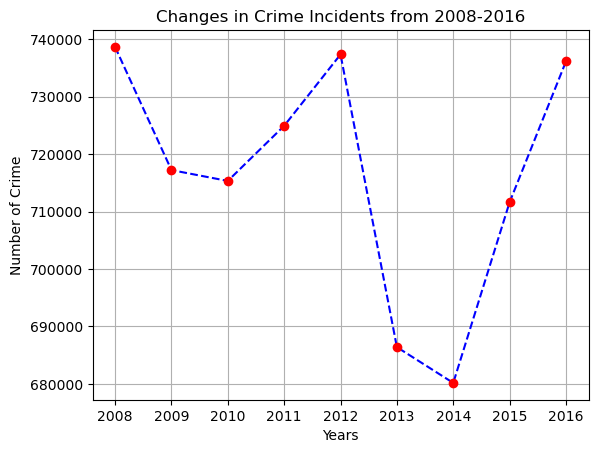

In [27]:
plt.plot(total_crime, "b--", total_crime, "ro")
plt.grid(True)

plt.title('Changes in Crime Incidents from 2008-2016')
plt.ylabel('Number of Crime')
plt.xlabel('Years')

plt.show()

Berdasarkan grafik garis diatas dapat disimpulkan bahwa total major category tertinggi yaitu pada tahun 2008 dengan total 738.641 kasus, sedangkan yang terendah yaitu pada tahun 2014 dengan total 680.183 kasus. 

---

### Area Plot

#### Visualisasi 5 major category paling banyak dari tahun 2008-2016

Membuat variabel 'top5_crime' yang berisi 5 major category terbanyak selama tahun 2008-2016 dan diurutkan dari total paling tinggi

In [28]:
major_crime.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# untuk mendapatkan 5 kategori teratas
top5_crime = major_crime.head()

# transpose data
top5_crime = top5_crime[years].transpose()

top5_crime

major_category,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs
2008,283692,159844,88092,91872,68804
2009,279492,160777,90619,85565,60549
2010,290924,157894,86826,77897,58674
2011,309292,146901,93315,70914,57550
2012,334054,150014,93392,62158,51776
2013,306372,146181,87222,56206,50278
2014,279880,185349,76053,59279,44435
2015,284022,218740,70489,62976,39785
2016,294133,232381,68285,64071,38914


Merubah index pada top5_crime menjadi integer

In [29]:
top5_crime.index = top5_crime.index.map(int)

Membuat visualisasi dari top5_crime dengan area plot tanpa stacked dan transparansi (alpha value) sebesar 0.25

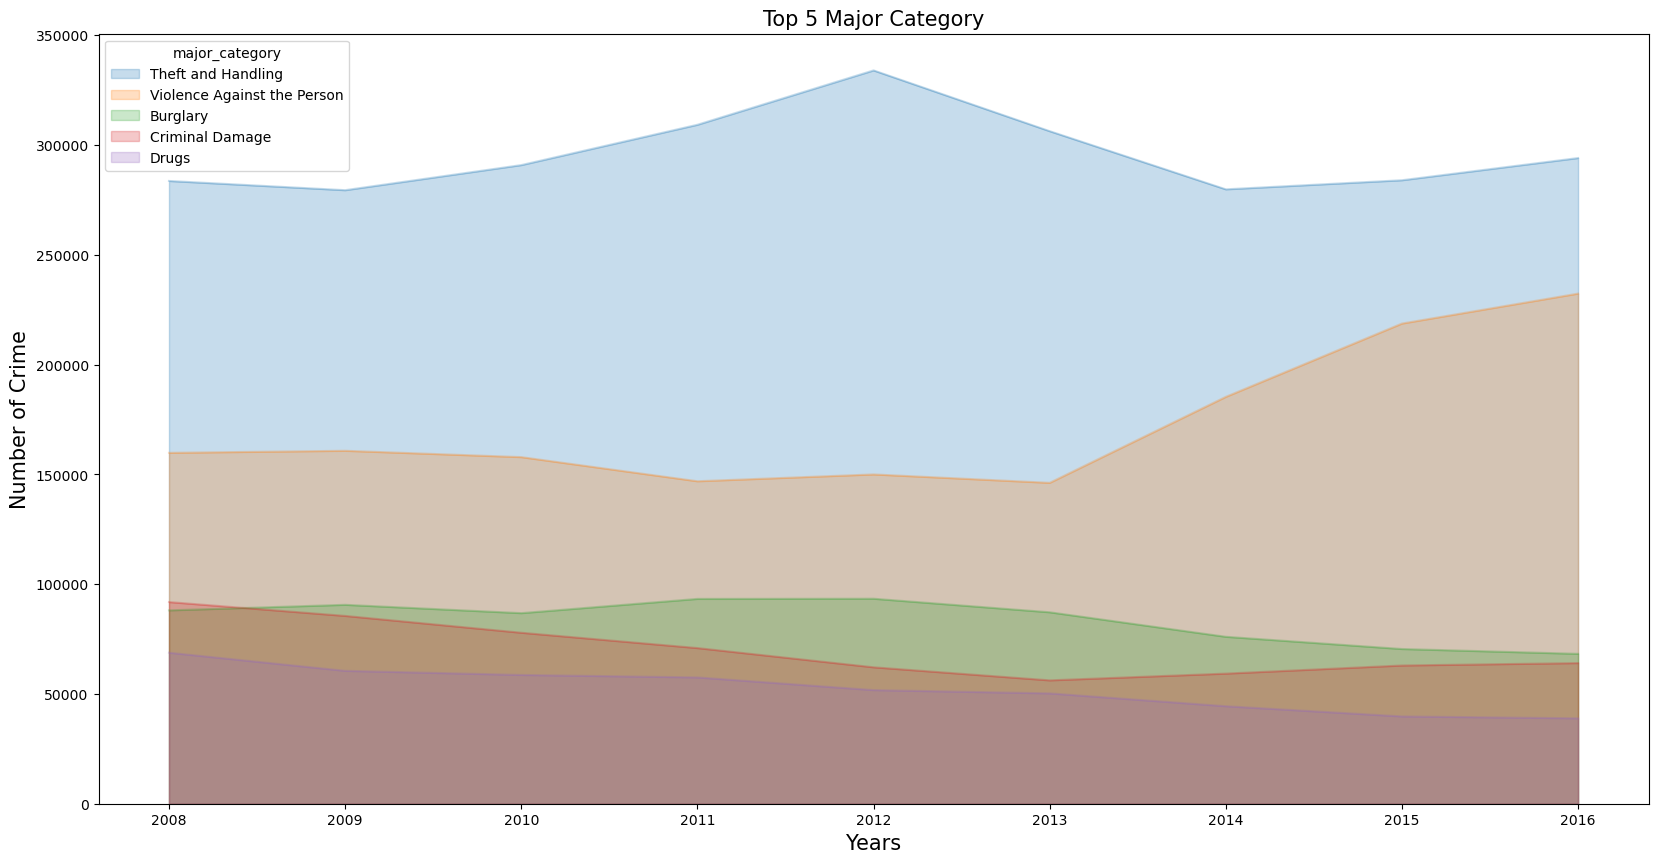

In [30]:
top5_crime.plot(kind='area',
                alpha=0.25,
                stacked=False,
                figsize=(20,10), # pass a tuple (x,y) size
                )

plt.title('Top 5 Major Category', fontsize=15)
plt.ylabel('Number of Crime', fontsize=15)
plt.xlabel('Years', fontsize=15)

plt.show()

#### Visualisasi 5 wilayah dengan kasus kriminal terendah dari tahun 2008-2016

Membuat variabel 'lowest5_borough' yang berisi 5 wilayah dengan kasus kriminal terendah selama tahun 2008-2016

In [31]:
crime_borough.sort_values(by='Total Crime in Borough', ascending=False, axis=0, inplace=True)

# untuk mendapatkan 5 kategori terendah
lowest5_borough = crime_borough.tail()

# transpose data
lowest5_borough = lowest5_borough[years].transpose()

lowest5_borough

borough,Bexley,Sutton,Richmond upon Thames,Kingston upon Thames,City of London
2008,15305,12943,11106,10661,0
2009,14445,12240,10618,10163,0
2010,13166,12032,10601,10171,0
2011,11325,11068,10896,10155,69
2012,11669,10948,11168,9956,157
2013,11552,10057,10439,9191,110
2014,11844,10443,10456,9288,115
2015,11990,10598,10413,9738,151
2016,12840,10658,11074,9983,178


Merubah index pada lowest5_borough menjadi integer

In [32]:
lowest5_borough.index = lowest5_borough.index.map(int)

Membuat visualisasi dari lowest5_borough dengan area plot tanpa stacked dan transparansi (alpha value) sebesar 0.25

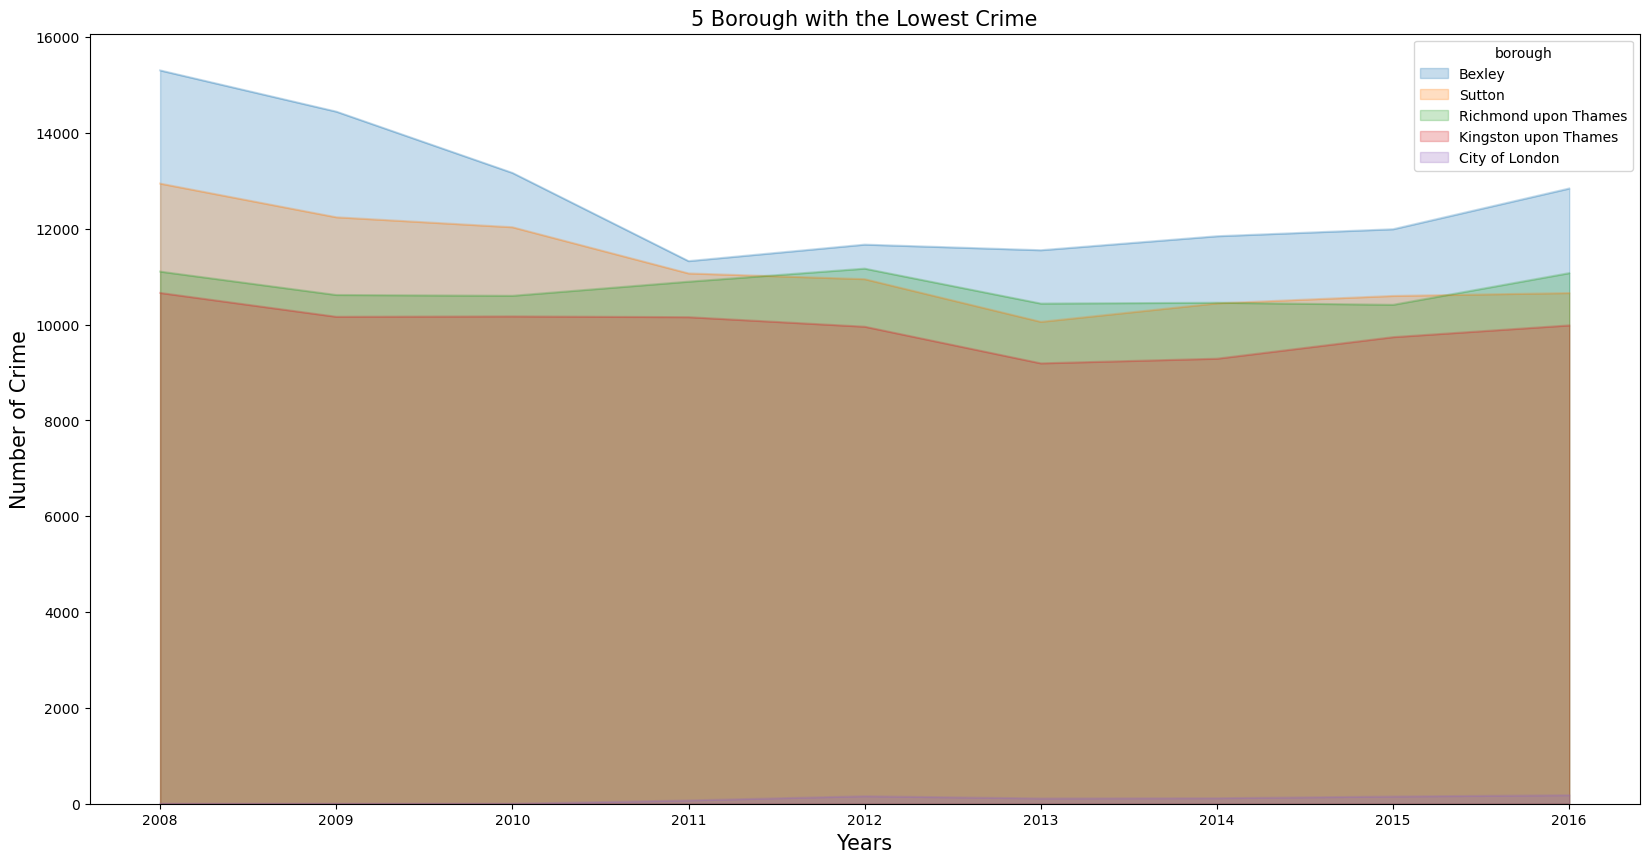

In [33]:
lowest5_borough.plot(kind='area',
                alpha=0.25,
                stacked=False,
                figsize=(20,10), # pass a tuple (x,y) size
                )

plt.title('5 Borough with the Lowest Crime', fontsize=15)
plt.ylabel('Number of Crime', fontsize=15)
plt.xlabel('Years', fontsize=15)

plt.show()

**Kesimpulan**
- 5 wilayah yang memiliki kasus kriminal terendah yaitu Bexley, Sutton, Richmond upon Thames, Kingston upon Thames, dan City of London
- Wilayah City of London memiliki tindak kriminal yang paling rendah dari wilayah yang lain dengan perbedaan yang  besar
- Pada tahun 2008-2010 tidak ada kasus kriminal di wilayah City of London
---

### Histogram

#### Distribusi frekuensi jumlah kasus kriminal dari kategori major pada tahun 2012

Menampilkan jenis dan jumlah kasus kriminal pada tahun 2012

In [34]:
major_crime['2012'].head()

major_category
Theft and Handling             334054
Violence Against the Person    150014
Burglary                        93392
Criminal Damage                 62158
Drugs                           51776
Name: 2012, dtype: int64

In [35]:
# np.histograms mengeluarkan 2 nilai
count, bin_edges = np.histogram(major_crime['2012'])

# print jumlah frekuensi
print(count)
# bin ranges, default = 10 bins
print(bin_edges) 

[3 3 1 0 1 0 0 0 0 1]
[     0.   33405.4  66810.8 100216.2 133621.6 167027.  200432.4 233837.8
 267243.2 300648.6 334054. ]


Membuat grafik distribusi ini dengan menyimpan kind=hist ke plot().

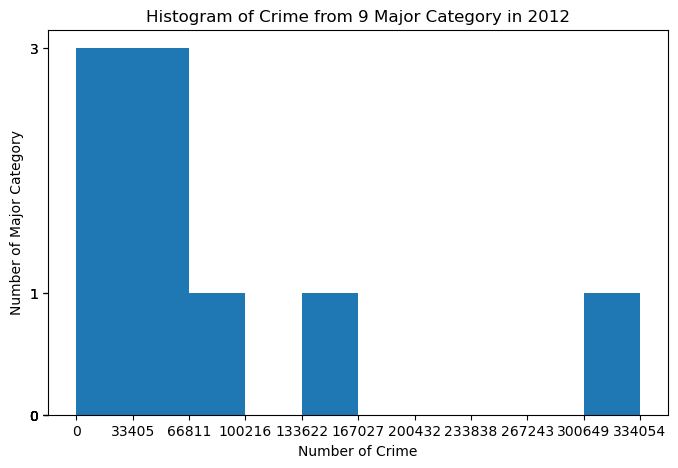

In [36]:
count, bin_edges = np.histogram(major_crime['2012'])

major_crime['2012'].plot(kind='hist', figsize=(8,5), xticks=bin_edges, yticks=count)

plt.title('Histogram of Crime from 9 Major Category in 2012')
plt.ylabel('Number of Major Category')
plt.xlabel('Number of Crime')

plt.show()

**Kesimpulan**

Secara default, metode histrogram memecah dataset menjadi 10 bin. Adapun kisaran bin dan distribusi frekuensi kasus kriminal di tahun 2012 yaitu:

- 3 kategori major menyumbang antara 0 hingga 33.405 kasus kriminal
- 3 kategori major menyumbang antara 33.405 hingga 66.811 kasus kriminal
- 1 kategori major menyumbang antara 66.811 hingga 100.216 kasus kriminal
- 1 kategori major menyumbang antara 133.622 hingga 167.027 kasus kriminal
- 1 kategori major menyumbang antara 300.649 hingga 334.054 kasus kriminal

#### Distribusi kasus kriminal di wilayah Greenwich, Redbridge, dan Brent	untuk tahun 2008-2016	

Menampilkan total kasus kriminal di wilayah Greenwich, Redbridge, dan Brent

In [37]:
crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun]

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Greenwich,22010,19851,18626,18552,20028,18948,19894,20929,22730
Redbridge,20873,20837,20652,21994,21424,19793,19590,18897,19502
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693


Membuat variabel 'df_grb' dan melakukan transpose dari dataset sebelumnya

In [38]:
df_grb = crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun].T
df_grb

borough,Greenwich,Redbridge,Brent
2008,22010,20873,23504
2009,19851,20837,24748
2010,18626,20652,25512
2011,18552,21994,27669
2012,20028,21424,26357
2013,18948,19793,23759
2014,19894,19590,24426
2015,20929,18897,24883
2016,22730,19502,26693


Meningkatkan ukuran bin menjadi 15 dengan meneruskan parameter bins

In [39]:
count, bin_edges = np.histogram(df_grb, 15)
print(count)
print(bin_edges)

[4 2 4 4 1 2 1 0 2 1 2 1 1 1 1]
[18552.  19159.8 19767.6 20375.4 20983.2 21591.  22198.8 22806.6 23414.4
 24022.2 24630.  25237.8 25845.6 26453.4 27061.2 27669. ]


- Mengatur transparansi menjadi 60% dengan meneruskan parameter alfa
- Memberi label sumbu x dengan melewatkan parameter label-x
- Mengubah warna plot dengan memasukkan parameter warna
- Menggunakan parameter stacked agar plot tidak saling tumpang tindih

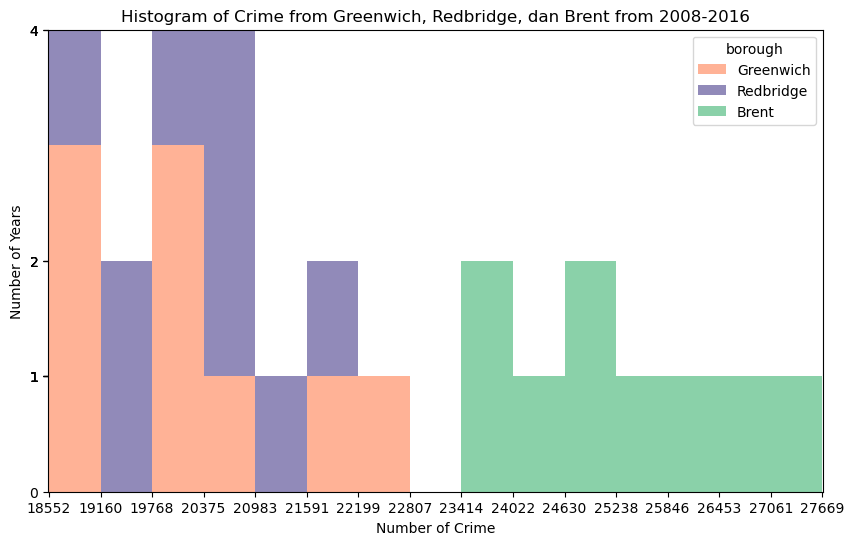

In [40]:
count, bin_edges = np.histogram(df_grb, 15)
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10  

df_grb.plot(kind='hist',
          figsize=(10,6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          yticks=count,  
          stacked=True,
          xlim=(xmin,xmax),  
          color=['coral', 'darkslateblue', 'mediumseagreen']
          )

plt.title('Histogram of Crime from Greenwich, Redbridge, dan Brent from 2008-2016')
plt.xlabel('Number of Crime')
plt.ylabel('Number of Years')

plt.show()

---

### Bar Chart

#### Bandingkan jumlah kasus kriminal pada kategori Drugs dari tahun 2008-2016

Membuat variabel 'df_drugs' dan menampilkan data yang dibutuhkan

In [41]:
df_drugs = major_crime.loc['Drugs', years]
df_drugs

2008    68804
2009    60549
2010    58674
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: Drugs, dtype: int64

Membuat plot data

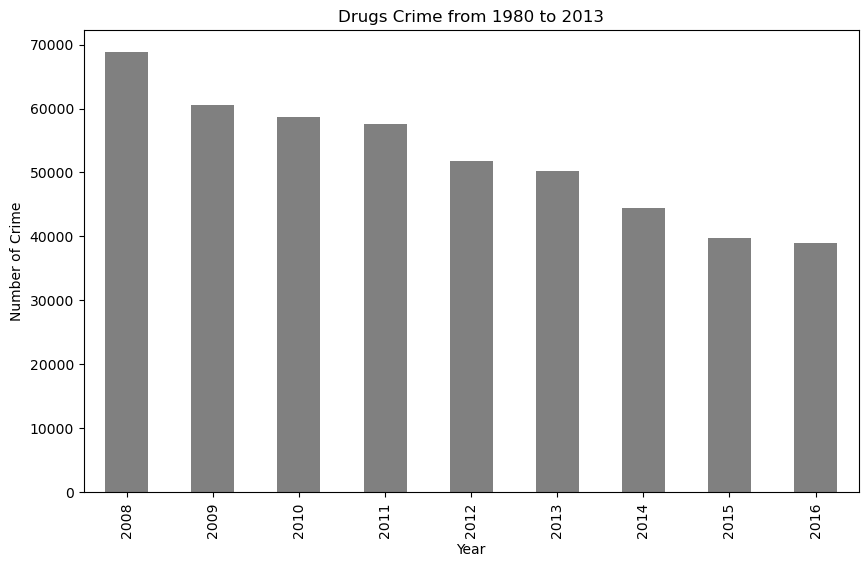

In [42]:
df_drugs.plot(kind='bar', figsize=(10,6), color='grey')

plt.title('Drugs Crime from 1980 to 2013')
plt.ylabel('Number of Crime')
plt.xlabel('Year')

plt.show()

**Kesimpulan**

- Kasus kriminal narkoba semakin menurun pada setiap tahun
- Tahun 2008 merupakan tahun dimana kasus narkoba sangat tinggi yaitu sebanyak 68.804 kasus
- Kasus narkoba paling rendah yaitu pada tahun 2016 dengan total 38.914 kasus

#### Bandingkan jumlah kasus kriminal di London dari tahun 2008-2016

Membuat variabel 'df_london' dan mengambil data yang diperlukan

In [43]:
df_london = crime_borough['Total Crime in Borough']
df_london.head()

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: Total Crime in Borough, dtype: int64

Membuat plot dari df_london

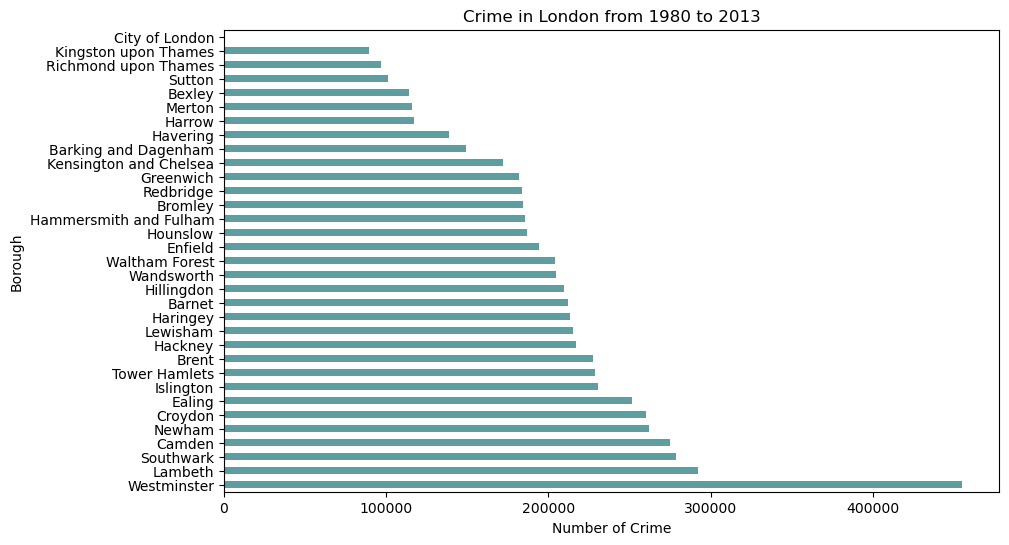

In [44]:
df_london.plot(kind='barh', figsize=(10,6), color='cadetblue')

plt.title('Crime in London from 1980 to 2013')
plt.ylabel('Borough')
plt.xlabel('Number of Crime')

plt.show()

**Kesimpulan**

- Bar chart diatas menampilkan kasus kriminal di london dari yang terendah hingga tertinggi secara horizontal
- Kasus kriminal tertinggi di London yaitu di wilayah Westminster
- Kasus kriminal terendah di London yaitu di wilayah City of London

### Pie Chart

#### 5 kasus kriminal tertinggi berdasarkan kategori major pada tahun 2016

Membuat variabel 'top5' dan mengambil data yang diperlukan

In [45]:
top5 = major_crime['2016'].head(5)
top5

major_category
Theft and Handling             294133
Violence Against the Person    232381
Burglary                        68285
Criminal Damage                 64071
Drugs                           38914
Name: 2016, dtype: int64

Membuat plot data

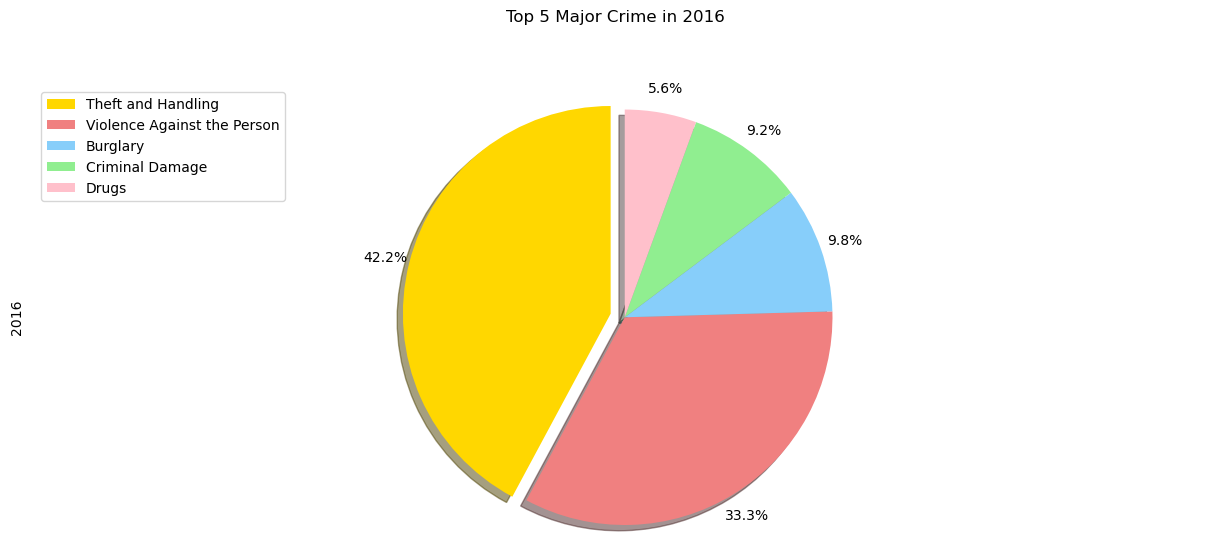

In [46]:
colors_list = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# jarak antar data pada pie chart
explode_list = [.07, 0, 0, 0, 0] 

top5.plot(kind='pie',
          figsize=(15, 6),
          autopct='%1.1f%%', 
          startangle=90,    
          shadow=True,       
          labels=None,         
          pctdistance=1.12,    
          colors=colors_list,  
          explode=explode_list 
         )

plt.title('Top 5 Major Crime in 2016', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=top5.index, loc='upper left') 

plt.show()

**Kesimpulan**

Berdasarkan pie chart diatas, didapatkan urutan persentase 5 kasus kriminal tertinggi berdasarkan kategori major pada tahun 2016 dari tinggi ke rendah adalah sebagai berikut :

1. Theft and Handling dengan persentase 42.2%
2. Violence Against the Person dengan persentase 33.3%
3. Bulgary dengan persentase 9.8%
4. Criminal Damage dengan persentase 9.2%
5. Drugs dengan persentase 5.6%

#### 7 wilayah dengan jumlah kasus kriminal tertinggi pada tahun 2008-2016

Membuat variabel 'top7' dan mengambil data yang diperlukan

In [47]:
top7 = crime_borough['Total Crime in Borough'].head(7)
top7

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Croydon        260294
Ealing         251562
Name: Total Crime in Borough, dtype: int64

Membuat plot data

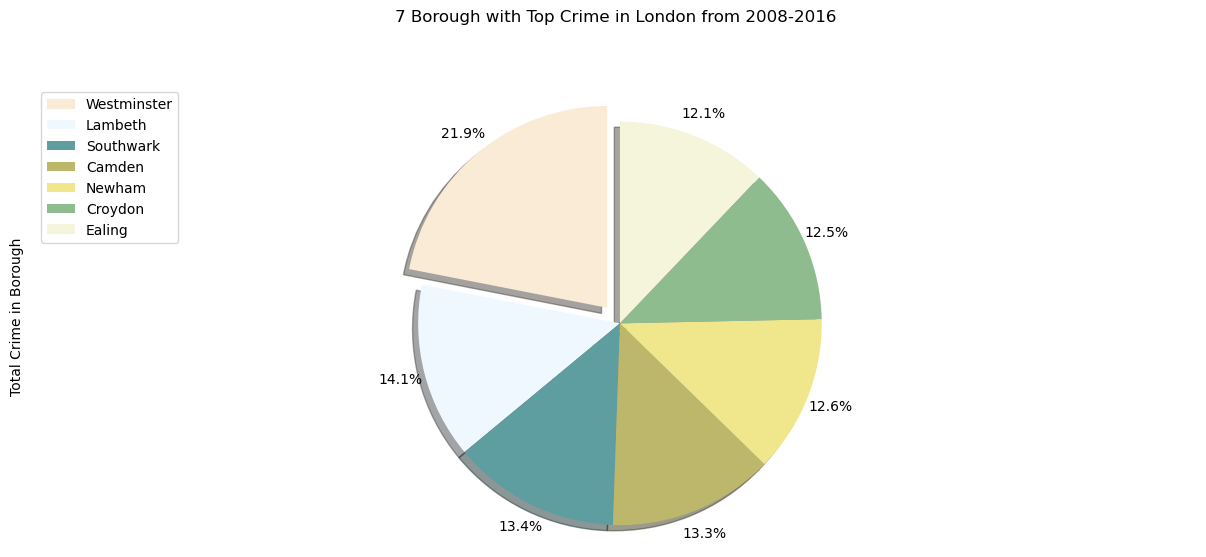

In [48]:
colors_list = ['antiquewhite', 'aliceblue', 'cadetblue', 'darkkhaki', 'khaki', 'darkseagreen', 'beige']
explode_list = [0.1, 0, 0, 0, 0, 0, 0]

top7.plot(kind='pie',
          figsize=(15, 6),
          autopct='%1.1f%%', 
          startangle=90,    
          shadow=True,       
          labels=None,         
          pctdistance=1.12,    
          colors=colors_list,  
          explode=explode_list 
         )

plt.title('7 Borough with Top Crime in London from 2008-2016', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=top7.index, loc='upper left') 

plt.show()

**Kesimpulan**

Berdasarkan pie chart diatas, didapatkan urutan persentase 7 wilayah di London dengan jumlah kasus kriminal dari tinggi ke rendah adalah sebagai berikut :

1. Westminster dengan persentase 21.9%
2. Lambeth dengan persentase 14.1%
3. Southwark dengan persentase 13.4%
4. Camden dengan persentase 13.3%
5. Newham dengan persentase 12.6%
6. Croydon dengan persentase 12.5%
7. Ealing dengan persentase 12.1%

Perbedaan persentase dari wilayah ke-2 sampai ke-7 tidak terlalu besar, tetapi dari wilayah urutan pertama yaitu Westminster ke urutan selanjutnya memliki perbedaan yang cukup besar

---

### Box Plot

#### Kasus kriminal dengan kategori Burglary pada tahun 2008-2016

Membuat variabel 'df_burglary' dan mengambil data yang diperlukan

In [49]:
df_burglary = major_crime.loc[['Burglary'], years].T
df_burglary.head()

major_category,Burglary
2008,88092
2009,90619
2010,86826
2011,93315
2012,93392


Membuat plot dengan jenis 'box'

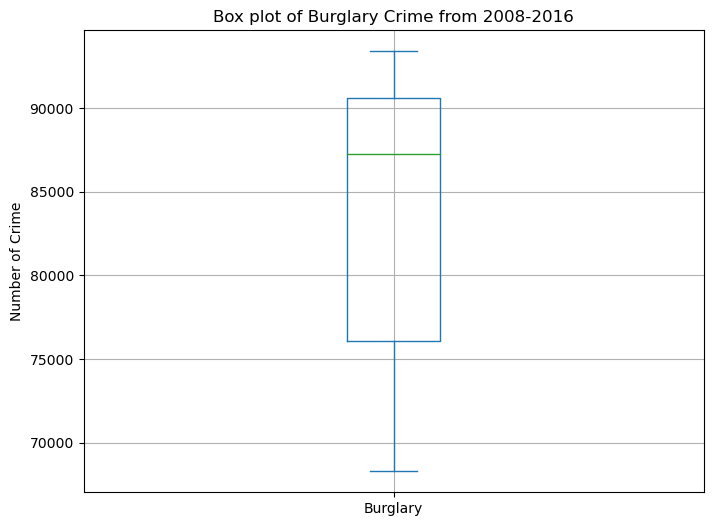

In [50]:
df_burglary.plot(kind='box', figsize=(8, 6), grid=True)

plt.title('Box plot of Burglary Crime from 2008-2016')
plt.ylabel('Number of Crime')

plt.show()

**Kesimpulan**

- Jumlah minimum kasus sekitar 70.000 (min), 
- Jumlah maksimum kasus sekitar 90.000 (max), 
- Jumlah rata-rata kasus sekitar 87.000 (median).
- 25%  untuk periode 2008-2016 memiliki jumlah kasus tahunan ~76.000 atau kurang (Kuartil pertama).
- 75%  untuk periode 2008-2016 memiliki jumlah kasus tahunan ~90.500 atau kurang (kuartil ketiga).

Kita bisa melihat angka aktual dengan memanggil metode describe() pada dataframe.

In [51]:
df_burglary.describe()

major_category,Burglary
count,9.000000
mean,83810.333333
std,9658.166674
min,68285.000000
25%,76053.000000
50%,87222.000000
75%,90619.000000
max,93392.000000


#### Perbandingan distribusi jumlah kasus dari wilayah Camden dan Ealing pada tahun 2008-2016

Membuat variabel 'df_ce' dan mengambil data yang diperlukan

In [52]:
df_ce = crime_borough.loc[(['Camden', 'Ealing'], tahun)].T
df_ce.head()

borough,Camden,Ealing
2008,32010,28947
2009,31612,28617
2010,31804,31360
2011,33956,29537
2012,31472,28832


Menampilkan persentase perbandingan antara 2 wilayah dengan metode describe()

In [53]:
df_ce.describe()

borough,Camden,Ealing
count,9.000000,9.000000
mean,30571.888889,27951.333333
std,2121.547633,2028.142192
min,27198.000000,24978.000000
25%,29183.000000,26247.000000
50%,31472.000000,28617.000000
75%,31804.000000,28947.000000
max,33956.000000,31360.000000


Membuat box plot dari df_ce

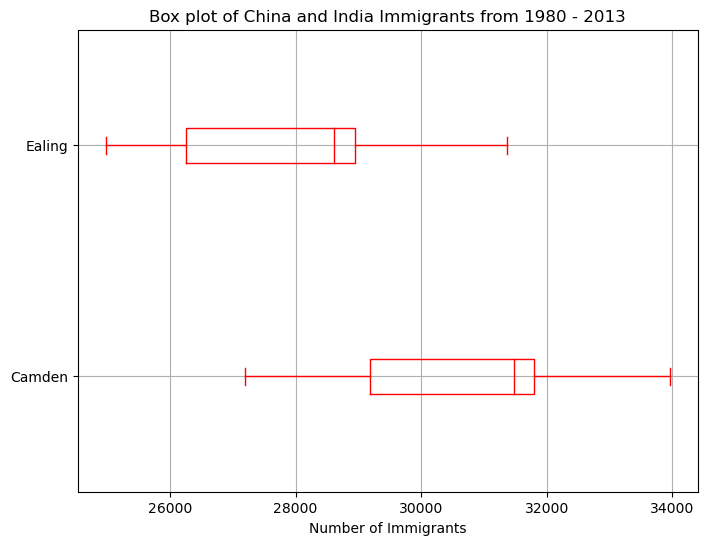

In [54]:
df_ce.plot(kind='box', figsize=(8, 6), grid=True, color='red', vert=False)

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.xlabel('Number of Immigrants')

plt.show()

**Kesimpulan**

- Wilayah Camden memiliki kasus kriminal lebih banyak dibandingkan dengan wilayah Ealing
- Kasus maksimum dari wilayah Ealing (31.360) hampir sama dengan median kasus dari wilayah Camden (31.472)
---

### Scatter Plot

#### Persebaran kasus kriminal dari Greenwich, Redbridge, dan Brent pada tahun 2008-2016

Membuat variabel 'df_total' dan mengambil data yang diperlukan

In [55]:
df_grb = crime_borough.loc[['Greenwich', 'Redbridge', 'Brent'], tahun].T
# menjumlahkan total kasus dari ketiga wilayah dan dimasukkan ke df_total
df_total = pd.DataFrame(df_grb.sum(axis=1))
df_total.reset_index(inplace=True)
# merubah nama kolom menjadi year dan total
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total

,year,total
0,2008,66387
1,2009,65436
2,2010,64790
3,2011,68215
4,2012,67809
5,2013,62500
6,2014,63910
7,2015,64709
8,2016,68925


Membuat plot data dengan jenis scatter

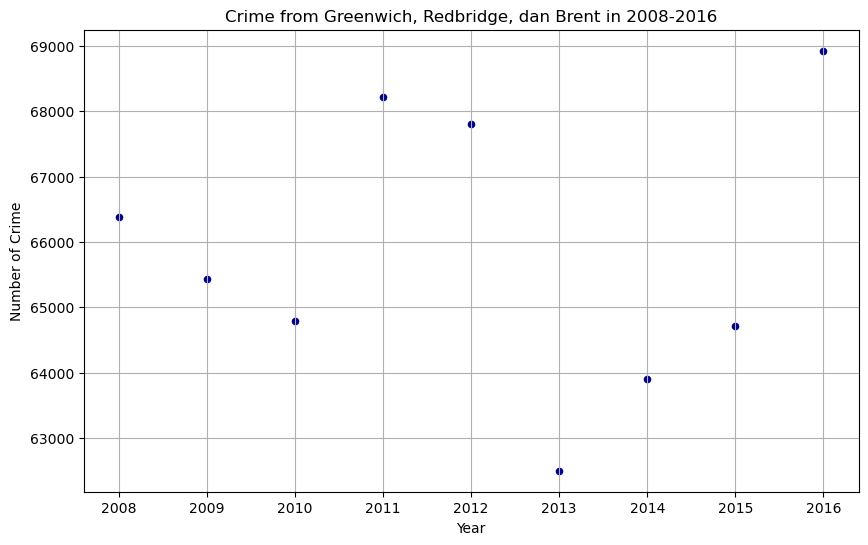

In [56]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue', grid=True)
plt.title('Crime from Greenwich, Redbridge, dan Brent in 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.show()

**Kesimpulan**

- Tahun 2016 merupakan tahun dimana terjadi kasus kriminal tertinggi di 3 wilayah yaitu Greenwich, Redbridge, dan Brent
- Kasus kriminal terendah di Greenwich, Redbridge, dan Brent yaitu pada tahun 2013
---

### Word Clouds

#### Visualisasi kasus kriminal kategori minor di London

Menggunakan set untuk menghapus stopword yang berlebihan

In [57]:
stopwords = set(STOPWORDS)

Membuat variabel minor_crime

In [59]:
minor_crime = ''.join(df_crime.minor_category)

Inisialisasi objek word cloud dan generate word cloud

In [71]:
crime_wc = WordCloud(background_color='aliceblue',
                     max_words=100, 
                     stopwords=stopwords
                    )

crime_wc.generate(minor_crime)

Menampilkan wordcloud yang telah dibuat

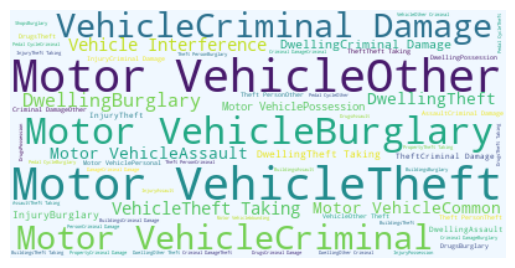

In [72]:
plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Memvisualisasikan words ke dalam sebuah gambar

In [86]:
bigben = np.array(Image.open('Assignment1/bigben.jpg'))

Mengecek masking 

In [87]:
bigben

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

Menampilkan gambar masking

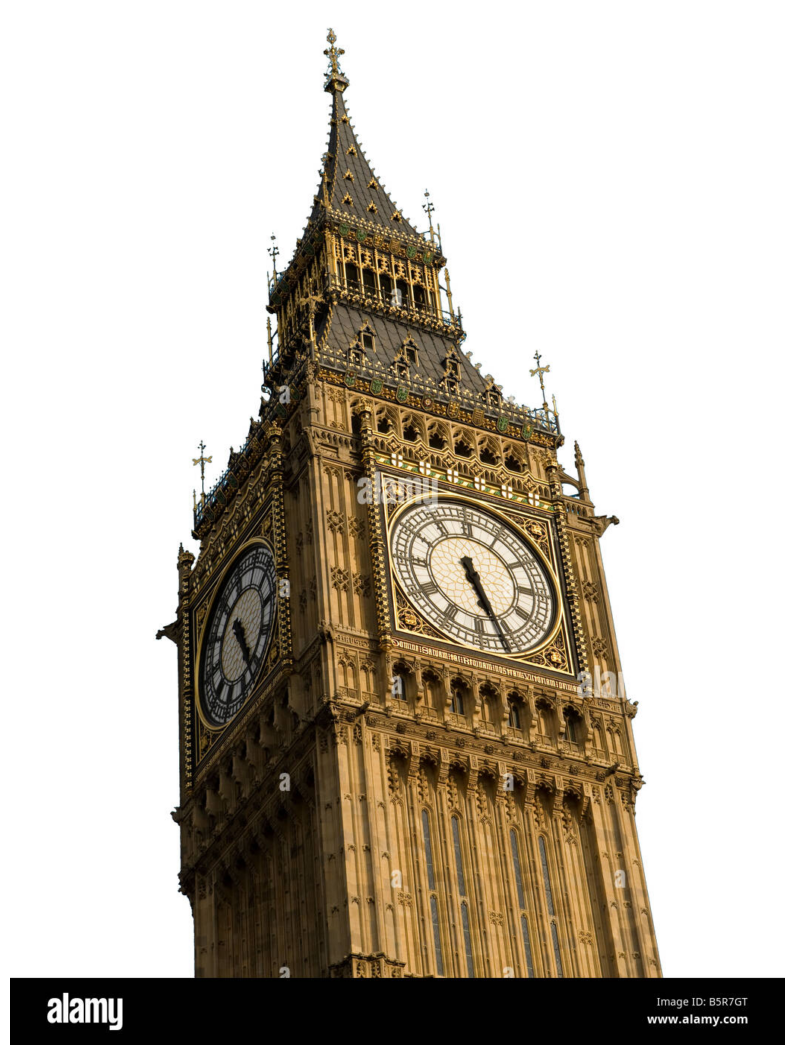

In [100]:
fig=plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(bigben,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk word cloud sesuai masking

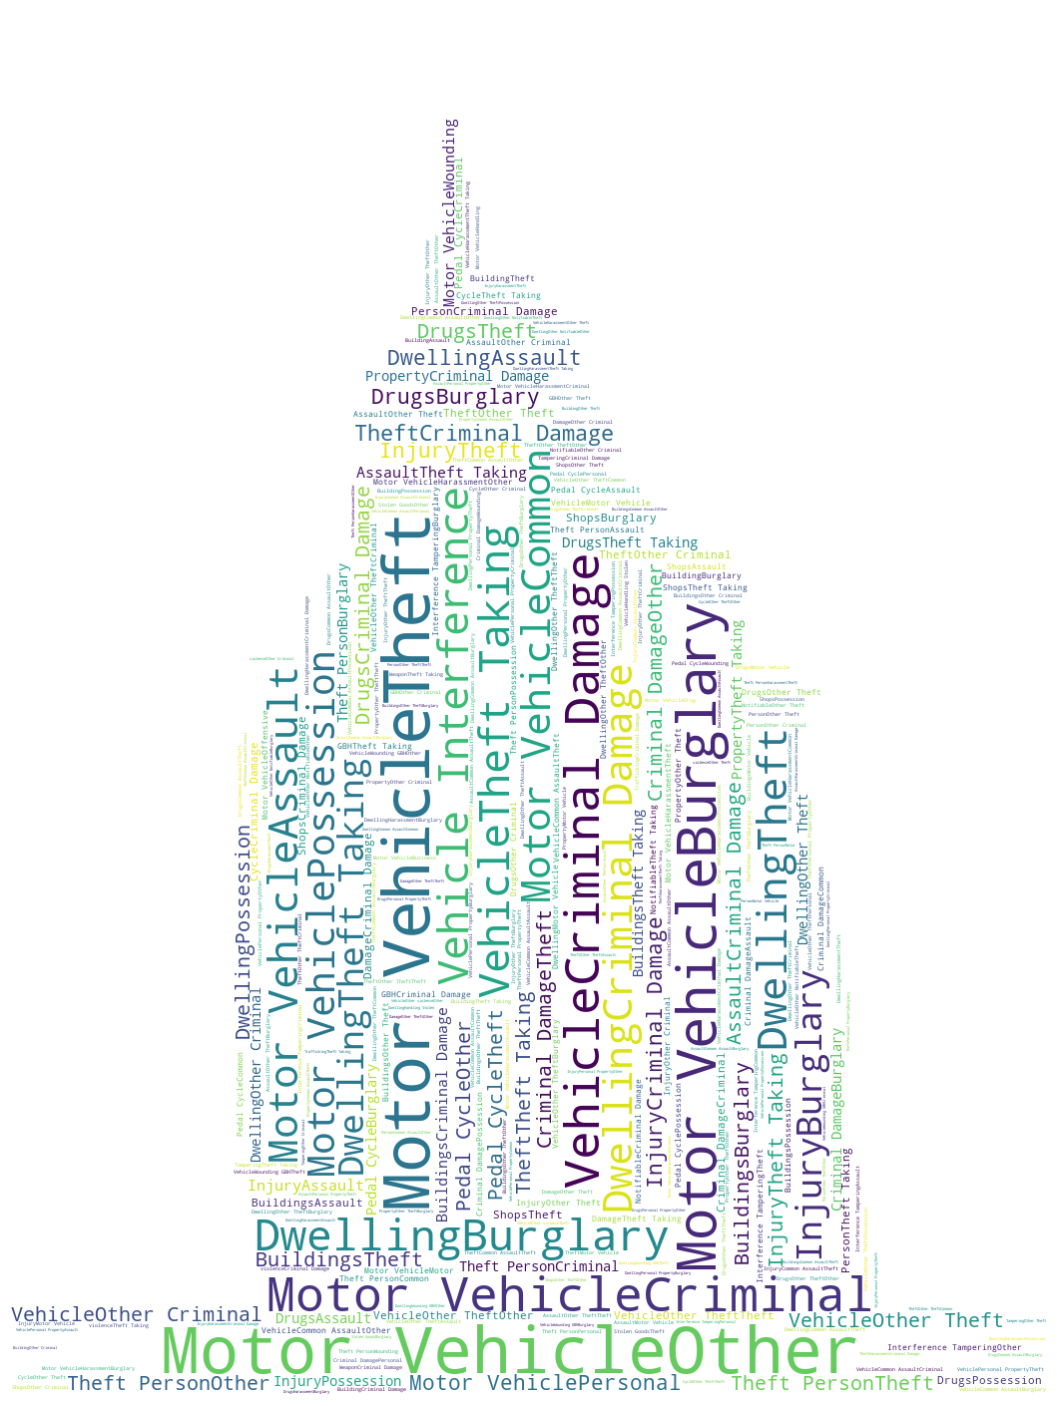

In [101]:
crime_wc = WordCloud(background_color='white', max_words=300,
                    mask=bigben, stopwords=stopwords)

crime_wc.generate(minor_crime)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(crime_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

**Kesimpulan**

Berdasarkan wordcloud diatas dengan cara melihat tulisan yang paling besar, maka dapat disimpulkan bahwa kategori kejahatan minor terbanyak di London yaitu Motor Vehicle Theft dan Motor Vehicle Other
___

### Folium Maps

#### Visualisasi peta London menggunakan folium

Mengatur latitude dan longitude dari negara London

In [95]:
latitude = 51.509865
longitude = -0.118092

Membuat london_map dan menampilkannya

In [98]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

london_map

#### Visualisasi peta London dengan Stamen Toner Maps

In [97]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Toner')

london_map

#### Visualisasi peta London dengan Stamen Terrain Maps

In [99]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Terrain')

london_map

---